In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples = 1000,   # 1000 observations
    n_features = 3,      # 3 Total features
    n_redundant = 1,
    n_classes = 2,      # Binary target/label
    random_state = 999
)

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knc = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [6]:
y_pred = knc.predict(x_test)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.906060606060606
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       169
           1       0.93      0.88      0.90       161

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

[[158  11]
 [ 20 141]]


In [8]:
### Perform Hyperparameter tuning with ------
### k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

score = []
for k in range(1, 11):
    knc = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
    knc.fit(x_train, y_train)
    y_pred = knc.predict(x_test)
    score.append(accuracy_score(y_test, y_pred))

score

[0.8787878787878788,
 0.8727272727272727,
 0.8878787878787879,
 0.896969696969697,
 0.906060606060606,
 0.896969696969697,
 0.9151515151515152,
 0.9090909090909091,
 0.9121212121212121,
 0.906060606060606]

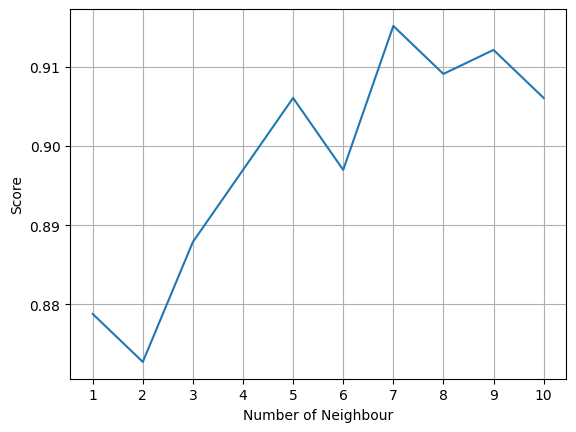

In [12]:
### Plot Score Curve
plt.plot(range(1, 11), score)
plt.xticks(range(1, 11))
plt.grid()
plt.xlabel("Number of Neighbour")
plt.ylabel("Score")
plt.show()